INFO:root:Start State: [0 0], Goal: [4 4], Obstacles: [array([1, 1]), array([1, 2]), array([2, 1]), array([3, 3])]


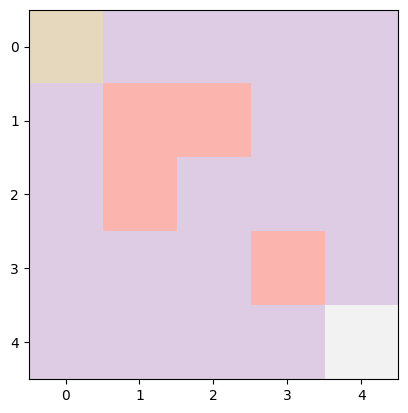

INFO:root:State: [0 0] -> Action: down -> Next State: [1 0], Reward: -1


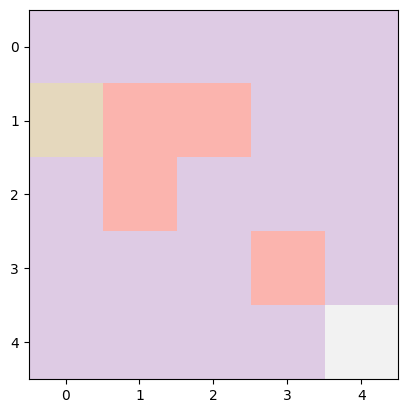

INFO:root:State: [1 0] -> Action: down -> Next State: [2 0], Reward: -1


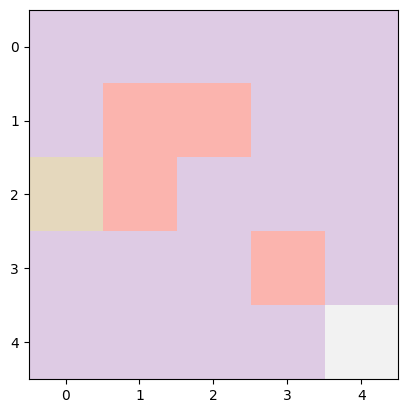

INFO:root:State: [2 0] -> Action: down -> Next State: [3 0], Reward: -1


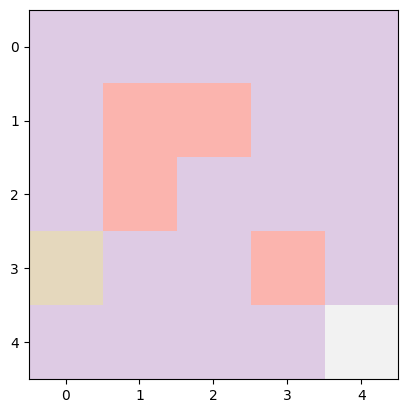

INFO:root:State: [3 0] -> Action: down -> Next State: [4 0], Reward: -1


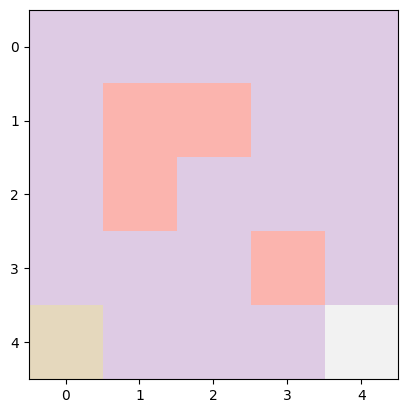

INFO:root:State: [4 0] -> Action: right -> Next State: [4 1], Reward: -1


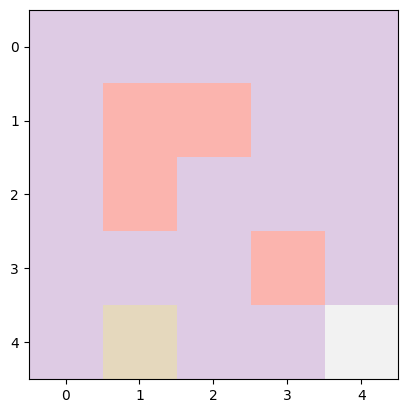

INFO:root:State: [4 1] -> Action: right -> Next State: [4 2], Reward: -1


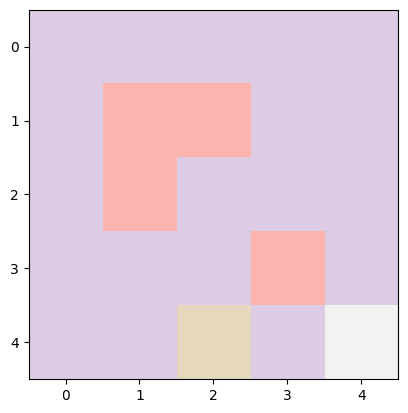

INFO:root:State: [4 2] -> Action: right -> Next State: [4 3], Reward: -1


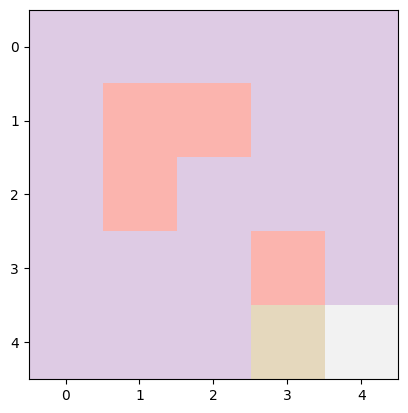

INFO:root:State: [4 3] -> Action: right -> Next State: [4 4], Reward: 100
INFO:root:Goal reached!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

class GridWorld:
    """
    GridWorld environment for navigation.
    
    Args:
    - width: Width of the grid
    - height: Height of the grid
    - start: Start position of the agent
    - goal: Goal position of the agent
    - obstacles: List of obstacles in the grid
        
    Methods:
    - reset: Reset the environment to the start state
    - is_valid_state: Check if the given state is valid
    - step: Take a step in the environment
    """
    def __init__(self, width: int = 5, height: int = 5, start: tuple = (0, 0), goal: tuple = (4, 4), obstacles: list = None):
        self.width = width
        self.height = height
        self.start = np.array(start)
        self.goal = np.array(goal)
        self.obstacles = [np.array(obstacle) for obstacle in obstacles] if obstacles else []
        self.state = self.start
        self.actions = {'up': np.array([-1, 0]), 'down': np.array([1, 0]), 'left': np.array([0, -1]), 'right': np.array([0, 1])}

    def reset(self):
        """ 
        Reset the environment to the start state
        
        Returns:
        - Start state of the environment
        """
        self.state = self.start
        return self.state

    def is_valid_state(self, state):
        """
        Check if the given state is valid

        Args:
        - state: State to be checked

        Returns:
        - True if the state is valid, False otherwise
        """
        return 0 <= state[0] < self.height and 0 <= state[1] < self.width and all((state != obstacle).any() for obstacle in self.obstacles)

    def step(self, action: str):
        """
        Take a step in the environment

        Args:
        - action: Action to be taken

        Returns:
        - Next state, reward, done
        """
        next_state = self.state + self.actions[action]
        if self.is_valid_state(next_state):
            self.state = next_state
        reward = 100 if (self.state == self.goal).all() else -1
        done = (self.state == self.goal).all()
        return self.state, reward, done

def navigation_policy(state: np.array, goal: np.array, obstacles: list):
    """
    Policy for navigating the agent in the grid world environment

    Args:
    - state: Current state of the agent
    - goal: Goal state of the agent
    - obstacles: List of obstacles in the environment

    Returns:
    - Action to be taken by the agent
    """
    actions = ['up', 'down', 'left', 'right']
    valid_actions = {}
    for action in actions:
        next_state = state + env.actions[action]
        if env.is_valid_state(next_state):
            valid_actions[action] = np.sum(np.abs(next_state - goal))
    return min(valid_actions, key=valid_actions.get) if valid_actions else None

def run_simulation_with_policy(env: GridWorld, policy):
    """
    Run the simulation with the given policy

    Args:
    - env: GridWorld environment
    - policy: Policy to be used for navigation
    """
    state = env.reset()
    done = False
    logging.info(f"Start State: {state}, Goal: {env.goal}, Obstacles: {env.obstacles}")
    while not done:
        # Visualization
        grid = np.zeros((env.height, env.width))
        grid[tuple(state)] = 1  # current state
        grid[tuple(env.goal)] = 2  # goal
        for obstacle in env.obstacles:
            grid[tuple(obstacle)] = -1  # obstacles

        plt.imshow(grid, cmap='Pastel1')
        plt.show()

        action = policy(state, env.goal, env.obstacles)
        if action is None:
            logging.info("No valid actions available, agent is stuck.")
            break
        next_state, reward, done = env.step(action)
        logging.info(f"State: {state} -> Action: {action} -> Next State: {next_state}, Reward: {reward}")
        state = next_state
        if done:
            logging.info("Goal reached!")

# Define obstacles in the environment
obstacles = [(1, 1), (1, 2), (2, 1), (3, 3)]

# Create the environment with obstacles
env = GridWorld(obstacles=obstacles)

# Run the simulation
run_simulation_with_policy(env, navigation_policy)